<center><h1>EE69205: Signal Processing System Design</h1></center>
<center><h2>End Semester Lab Examination</h2></center>
<center><h3>Anirvan Krishna | 21EE38002</h3></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import sem
from scipy.io import loadmat
from scipy.signal import medfilt, firwin, lfilter, butter, filtfilt
from scipy.ndimage import gaussian_filter1d

## Experiment-4: PPG Data
This is a Pulse Plathysmogram (PPG) data. Find the cardiac time period (in samples), location of the secondary notches. Mark them with stars superimposed on the plot.

There is a variation in the peak values. Its is also periodic. Can you find that time period of that oscillation?

In [2]:
data = loadmat('Data\Q4ppg.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Oct 24 18:39:51 2021',
 '__version__': '1.0',
 '__globals__': [],
 'ppg': array([[-0.90618885, -0.91436699, -0.93072327, ..., -0.86529816,
         -0.61177588, -0.24375966]])}

In [4]:
x = data['ppg']

In [5]:
x = x.reshape(x.shape[1])

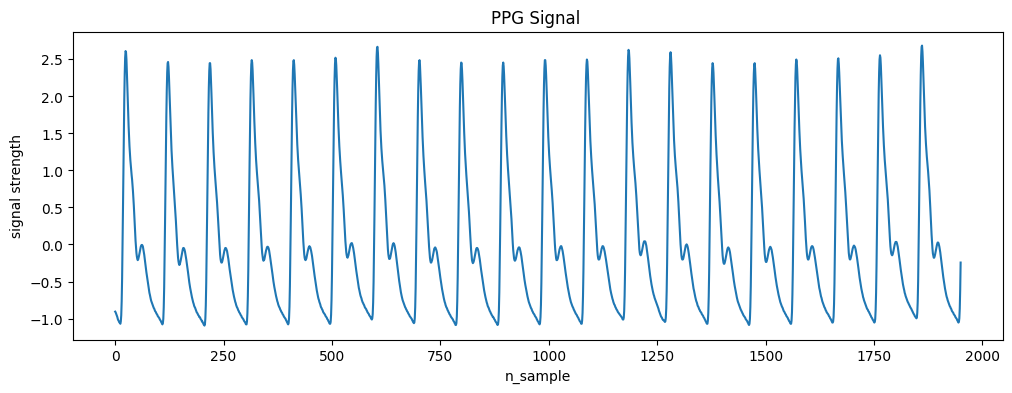

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(x)
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('PPG Signal ')
plt.show()

Cardiac Time Period: 96.68


Text(0.5, 1.0, 'Identiying Systole, Diastole and Dicrotic Notches')

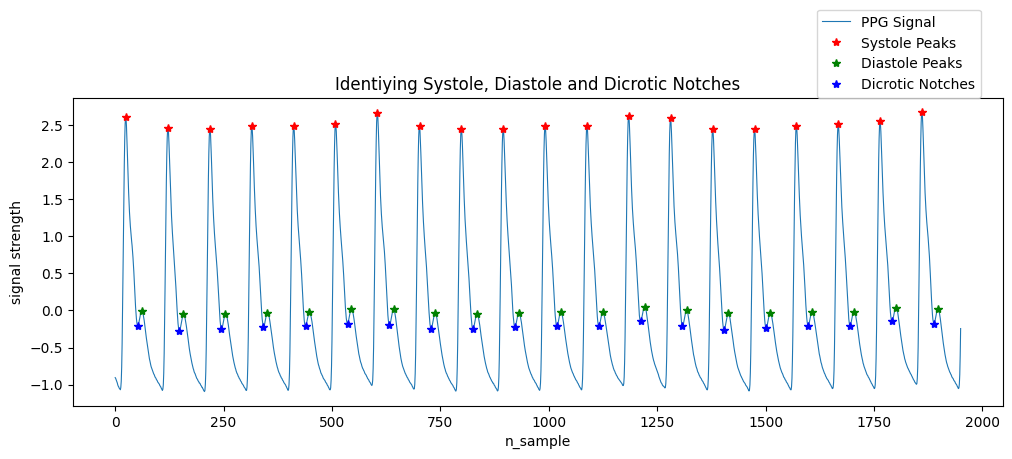

In [7]:
# Find peaks in the PPG signal
s1_peaks, _ = signal.find_peaks(x, height=0.5, distance=50)  # Adjust distance based on expected heart rate

# Find secondary peaks
notches, _ = signal.find_peaks(-x, distance=50)  

s2_peaks = []
dicrotic_notches = []

for i in range(len(s1_peaks)):
    # Define the segment of the signal
    segment = x[s1_peaks[i]:notches[i+1]]

    # Find local maxima in the segment
    local_maxima, _ = signal.find_peaks(segment)
    local_minima, _ = signal.find_peaks(-segment)

    s2_peaks.append(s1_peaks[i] + local_maxima)
    dicrotic_notches.append(s1_peaks[i] + local_minima)

# Calculate cardiac time period (average distance between peaks)
cardiac_time_period = np.diff(s1_peaks).mean()
print(f"Cardiac Time Period: {cardiac_time_period:.2f}")

# Plot the signal with peaks and notches
plt.figure(figsize=(12, 4))
plt.plot(x, label='PPG Signal', linewidth=0.8)
plt.plot(s1_peaks, x[s1_peaks], 'r*', label='Systole Peaks')
plt.plot(s2_peaks, x[s2_peaks], 'g*', label='Diastole Peaks')
plt.plot(dicrotic_notches, x[dicrotic_notches], 'b*', label='Dicrotic Notches')
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.legend(loc=(0.8, 1))
plt.title("Identiying Systole, Diastole and Dicrotic Notches")

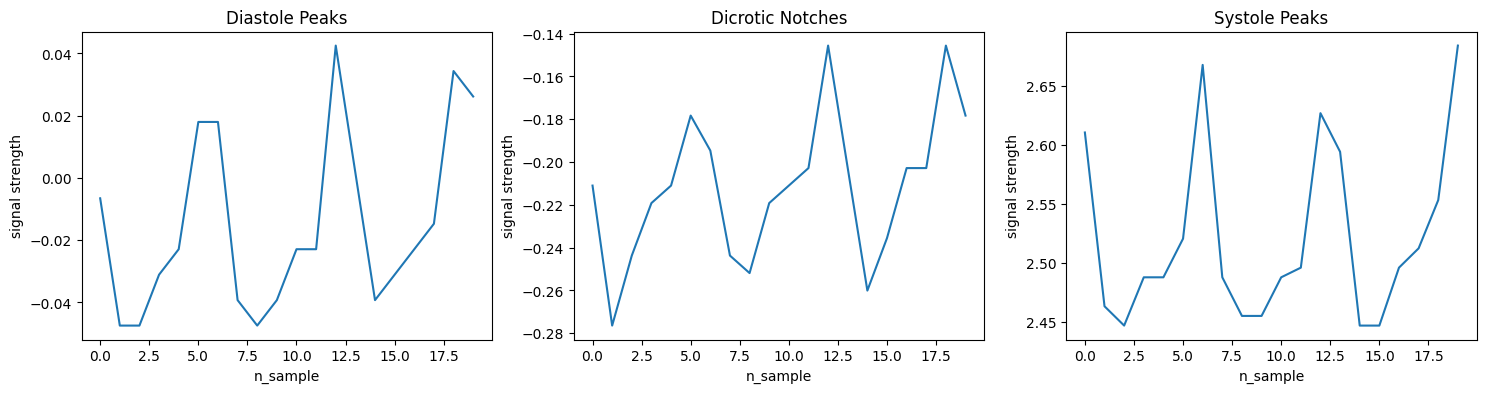

In [8]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.plot(x[s2_peaks])
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Diastole Peaks')

plt.subplot(1, 3, 2)
plt.plot(x[dicrotic_notches])
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Dicrotic Notches')

plt.subplot(1, 3, 3)
plt.plot(x[s1_peaks])
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Systole Peaks')

plt.show()

Systole Time Period: 579 samples
Diastole Time Period: 676 samples
Dicrotic Time Period: 676 samples


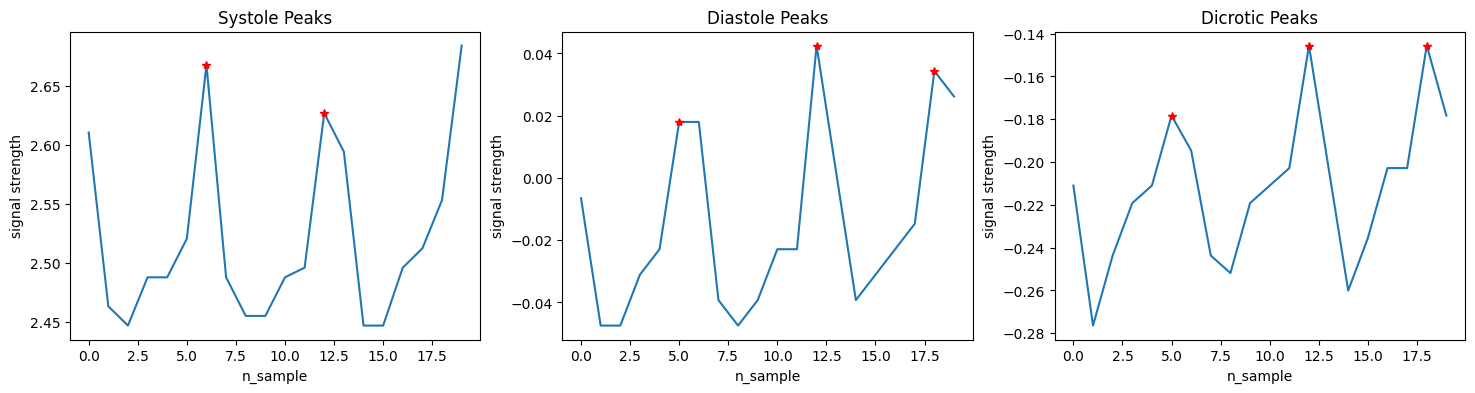

In [9]:
systole_array = x[s1_peaks]
diastole_array = x[s2_peaks].reshape(x[s2_peaks].shape[0])
dicrotic_array = x[dicrotic_notches].reshape(x[dicrotic_notches].shape[0])

# Adjust distance based on expected heart rate
systole_peaks, _ = signal.find_peaks(systole_array, height=2.5, distance=5)
diastole_peaks, _ = signal.find_peaks(diastole_array, height=0.01, distance=5)
dicrotic_peaks, _ = signal.find_peaks(dicrotic_array, height=-0.2, distance=5)

# s1 time period 
s1_peak1 = s1_peaks[systole_peaks[0]]
s1_peak2 = s1_peaks[systole_peaks[1]]
s1_time_period = s1_peak2 - s1_peak1

# s2 time period
s2_peak1 = s2_peaks[diastole_peaks[0]]
s2_peak2 = s2_peaks[diastole_peaks[1]]
s2_time_period = s2_peak2 - s2_peak1

# dicrotic time period
dicrotic_peak1 = dicrotic_notches[dicrotic_peaks[0]]
dicrotic_peak2 = dicrotic_notches[dicrotic_peaks[1]]
dicrotic_time_period = dicrotic_peak2 - dicrotic_peak1

print(f"Systole Time Period: {s1_time_period} samples")
print(f"Diastole Time Period: {s2_time_period[0]} samples")
print(f"Dicrotic Time Period: {dicrotic_time_period[0]} samples")


plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.plot(range(len(systole_array)), systole_array)
plt.plot(systole_peaks, systole_array[systole_peaks], 'r*')
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Systole Peaks')


plt.subplot(1, 3, 2)
plt.plot(range(len(diastole_array)), diastole_array)
plt.plot(diastole_peaks, diastole_array[diastole_peaks], 'r*')
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Diastole Peaks')


plt.subplot(1, 3, 3)
plt.plot(range(len(dicrotic_array)), dicrotic_array)
plt.plot(dicrotic_peaks, dicrotic_array[dicrotic_peaks], 'r*')
plt.xlabel('n_sample')
plt.ylabel('signal strength')
plt.title('Dicrotic Peaks')
plt.show()